CUSTOMER SEGMENTATION FOR MARKETING USING K-Nearest Neighbors (Clustering Technique)

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/tommy/OneDrive/Desktop/Mall_Customers.csv')

# Display the first few rows of the dataset
display(data.head())

# Check for general information and missing values
display(data.info())

,CustomerID,Gender,Age,Income (in Thousands),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Income (in Thousands)   200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

In [5]:
# Check for missing values
print(data.isnull().sum())

# Encode the 'Gender' column
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Alternatively, use get_dummies for encoding
# data = pd.get_dummies(data, columns=['Gender'])

CustomerID                0
Gender                    0
Age                       0
Income (in Thousands)     0
Spending Score (1-100)    0
dtype: int64


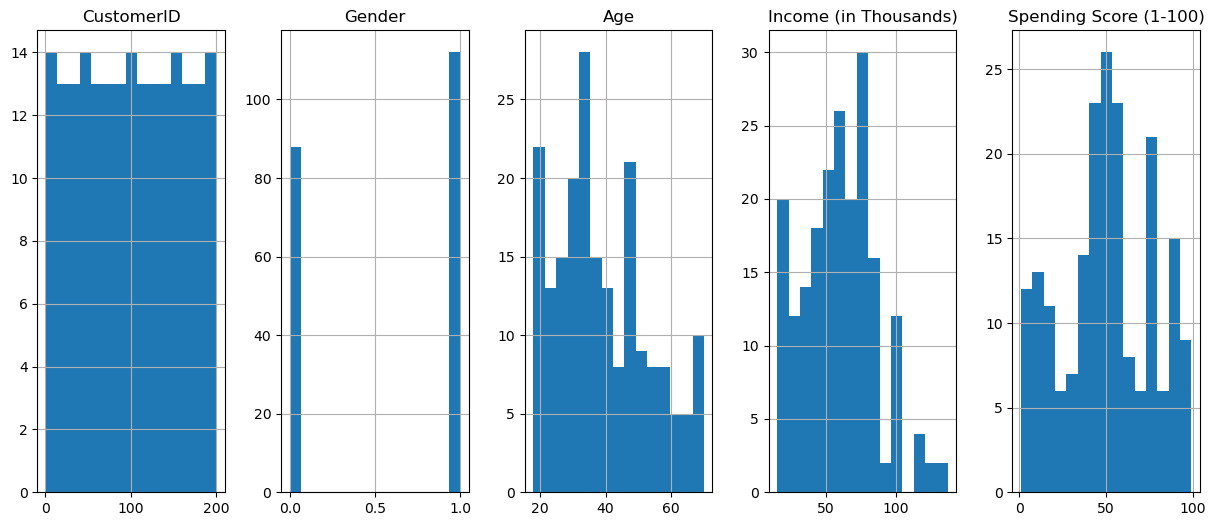

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for distributions
data.hist(bins=15, figsize=(15, 6), layout=(1, 5))
plt.show()

C:\Users\tommy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


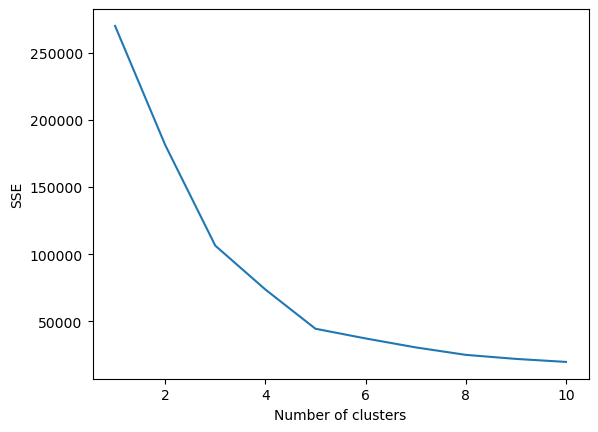

In [10]:
from sklearn.cluster import KMeans
import numpy as np

# Elbow method to find the optimal number of clusters
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data[['Income (in Thousands)', 'Spending Score (1-100)']])
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

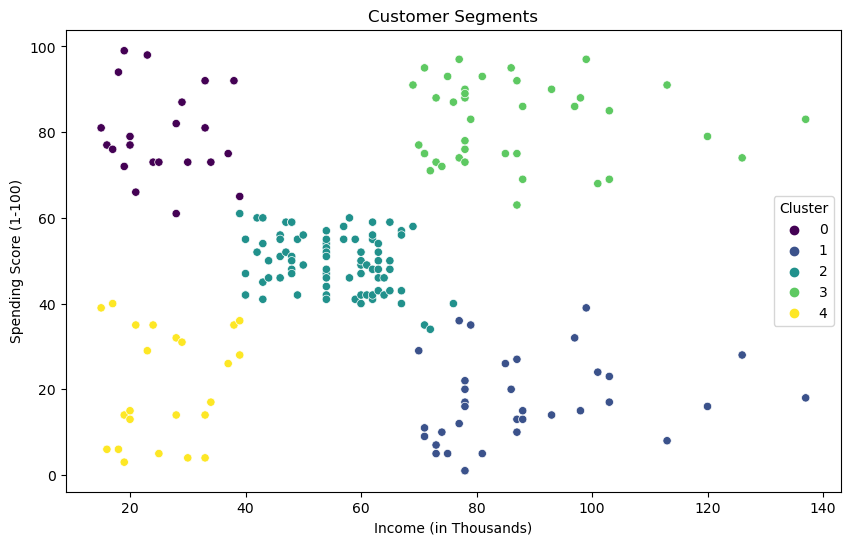

In [11]:
# Apply K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=5, random_state=1)
data['Cluster'] = kmeans.fit_predict(data[['Income (in Thousands)', 'Spending Score (1-100)']])

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Income (in Thousands)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()

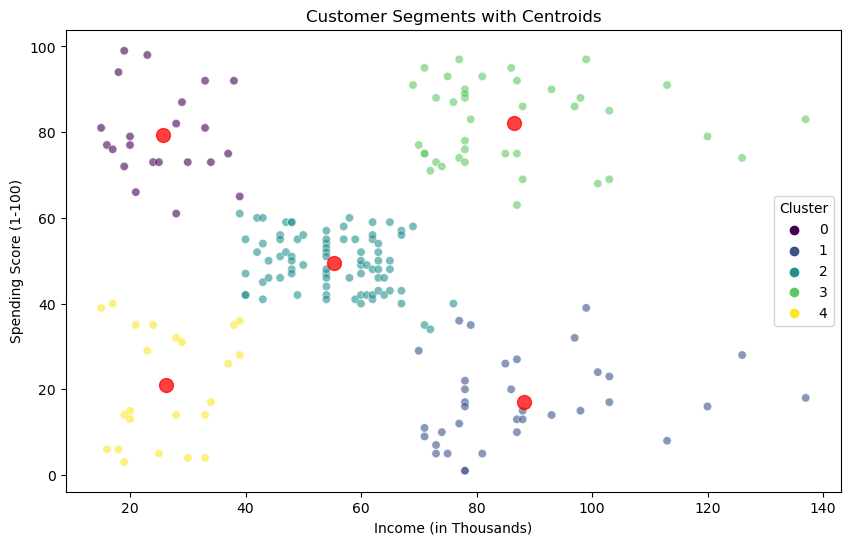

In [12]:
# Scatter plot for visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Income (in Thousands)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', alpha=0.6)

# Plot centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75)  # Assuming 0 and 1 indices for Income and Spending Score
plt.title('Customer Segments with Centroids')
plt.show()

This can be interpreted as the following:
Cluster 0: Low income, low spending score
Cluster 1: High income, high spending score
Cluster 2: Medium income, medium spending score
Cluster 3: High income, low spending score
Cluster 4: Low income, high spending score

Additional Detail / Segmentation:
Cluster 0 (Cautious Spenders): Customers with low income and low spending scores. They are cautious about their spending, likely due to their limited budget.

Cluster 1 (Premium Customers): Customers with high income and high spending scores. They are the ideal targets for high-end products and luxury goods.

Cluster 2 (Average Joes): Customers with moderate income and spending habits. They represent the average mall-going population and are receptive to a wide variety of products.

Cluster 3 (Frugal High Earners): Despite their high income, these customers have low spending scores. They may be saving-oriented or only spend on specific high-value items.

Cluster 4 (Opportunistic Shoppers): Customers with low income but high spending scores. They may be more impulsive or opportunistic, looking for discounts or promotions.

Using These Insights:

Marketing Strategies: Develop targeted marketing strategies for each cluster. For example, offer luxury product ads to Premium Customers and discount promotions to Opportunistic Shoppers.

Product Placement: Tailor the product placement in the mall based on the predominant customer segments that visit.